In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the number of samples
num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]

print(f"Number of training samples: {num_train_samples}")
print(f"Number of testing samples: {num_test_samples}")

# Check the size of images
image_size = x_train.shape[1:]  # Exclude the number of samples from the shape
print(f"Image size: {image_size}")


170498071/170498071 [==============================] - 2s 0us/step
Number of training samples: 50000
Number of testing samples: 10000
Image size: (32, 32, 3)


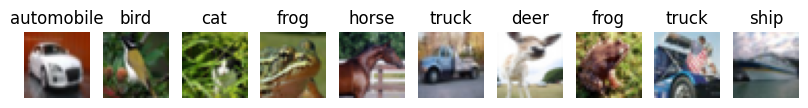

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels for CIFAR-10
class_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Function to plot images from the dataset
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[labels[i][0]])
        plt.axis('off')
    plt.show()

# Plot some random images from the training set
random_indices = np.random.randint(0, num_train_samples, size=10)
plot_images(x_train[random_indices], y_train[random_indices])


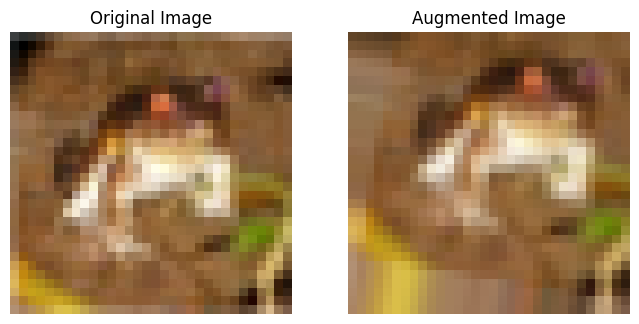

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize the pixel values to be between 0 and 1
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Data augmentation: You can apply various transformations to augment the dataset
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fit the data augmentation on the training set
datagen.fit(x_train_normalized)

# Example of applying data augmentation to a single image
augmented_image = datagen.flow(x_train_normalized[0:1], batch_size=1)[0][0]

# Plot the original and augmented images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_train_normalized[0])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.axis('off')

plt.show()


In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Input layer
input_layer = Input(shape=(32, 32, 3))

# Block 1
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)

# Block 2
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool2 = MaxPooling2D((2, 2))(conv4)

# Flatten and fully connected layers
flatten = Flatten()(pool2)
dense1 = Dense(256, activation='relu')(flatten)
output_layer = Dense(10, activation='softmax')(dense1)  # Assuming you have 10 classes in CIFAR-10

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                             

Epoch 1/100
274/274 [==============================] - 18s 26ms/step - loss: 1.5388 - accuracy: 0.4425 - val_loss: 1.1483 - val_accuracy: 0.5980
Epoch 2/100
  4/274 [..............................] - ETA: 5s - loss: 1.1791 - accuracy: 0.5840

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


274/274 [==============================] - 6s 24ms/step - loss: 1.0295 - accuracy: 0.6359 - val_loss: 1.0070 - val_accuracy: 0.6463
Epoch 3/100
274/274 [==============================] - 6s 23ms/step - loss: 0.8030 - accuracy: 0.7159 - val_loss: 0.8454 - val_accuracy: 0.7006
Epoch 4/100
274/274 [==============================] - 6s 22ms/step - loss: 0.6645 - accuracy: 0.7686 - val_loss: 0.7664 - val_accuracy: 0.7303
Epoch 5/100
274/274 [==============================] - 6s 22ms/step - loss: 0.5143 - accuracy: 0.8190 - val_loss: 0.7521 - val_accuracy: 0.7504
Epoch 6/100
274/274 [==============================] - 7s 24ms/step - loss: 0.3805 - accuracy: 0.8664 - val_loss: 0.7928 - val_accuracy: 0.7500
Epoch 7/100
274/274 [==============================] - 6s 23ms/step - loss: 0.2631 - accuracy: 0.9083 - val_loss: 0.8619 - val_accuracy: 0.7539
Epoch 8/100
274/274 [==============================] - 6s 22ms/step - loss: 0.1676 - accuracy: 0.9422 - val_loss: 0.9738 - val_accuracy: 0.7492
Epoc

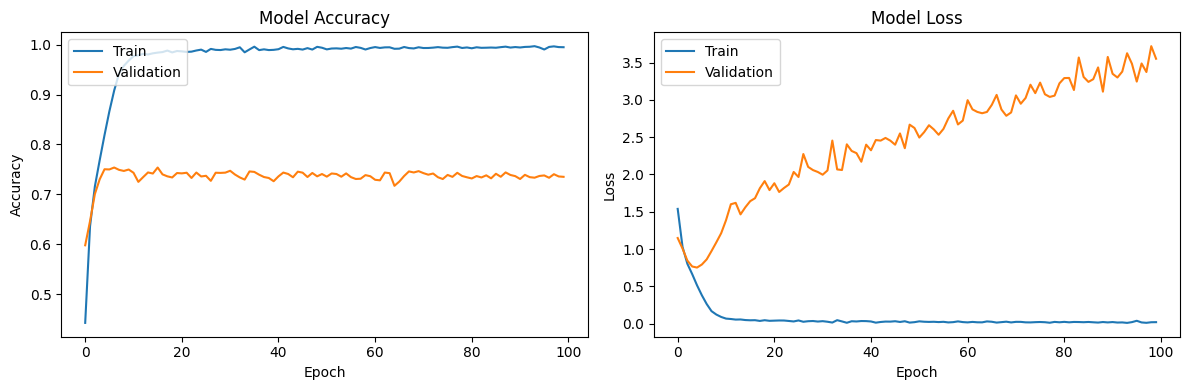

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# Train the model
batch_size = 128
epochs = 100
validation_split = 0.3

# Adding a ModelCheckpoint callback to save the best weights during training
checkpoint = ModelCheckpoint("vgg_like_model.h5", monitor='val_loss', save_best_only=True)

history = model.fit(
    x_train_normalized, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[checkpoint]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plot the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 65ms/step


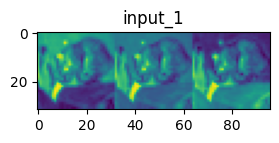

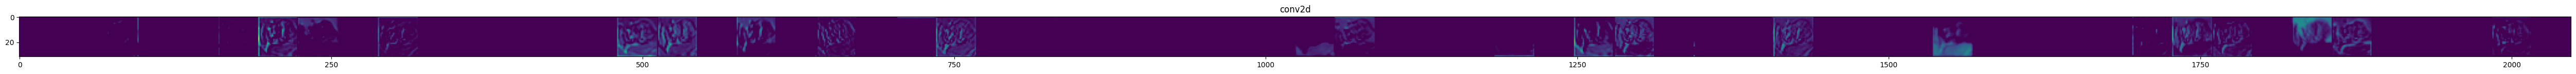

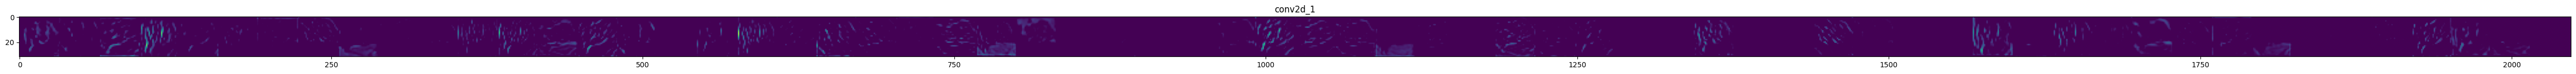

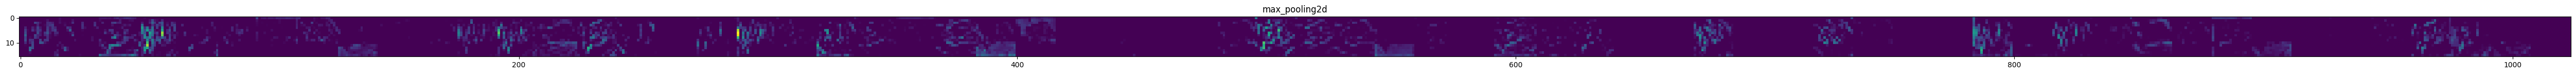

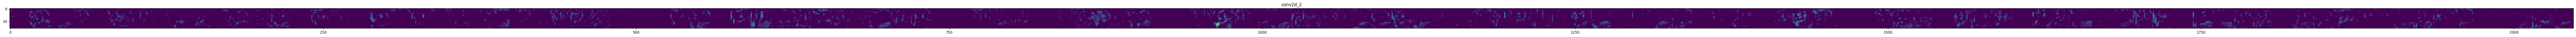

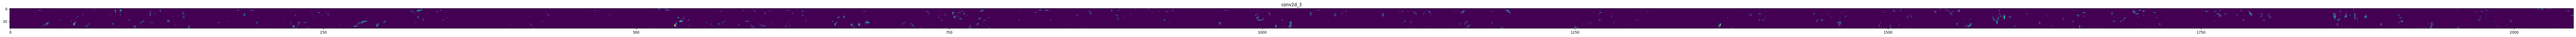

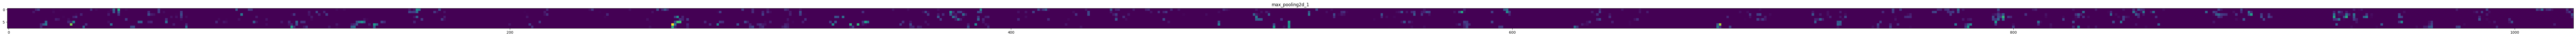

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import numpy as np

# Extract intermediate layer outputs
activation_layers = [layer.output for layer in model.layers if 'flatten' not in layer.name and 'dense' not in layer.name]
activation_model = Model(inputs=model.input, outputs=activation_layers)

# Choose an image from the test set
sample_image = x_test_normalized[0:1]

# Get activations
activations = activation_model.predict(sample_image)

# Plot the activations
layer_names = [layer.name for layer in model.layers if 'flatten' not in layer.name and 'dense' not in layer.name]

for layer_name, layer_activation in zip(layer_names, activations):
    if len(layer_activation.shape) == 4:
        # Plot the feature maps for convolutional layers
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            channel_image = layer_activation[0, :, :, i]
            display_grid[:, i * size : (i + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()


94765736/94765736 [==============================] - 0s 0us/step


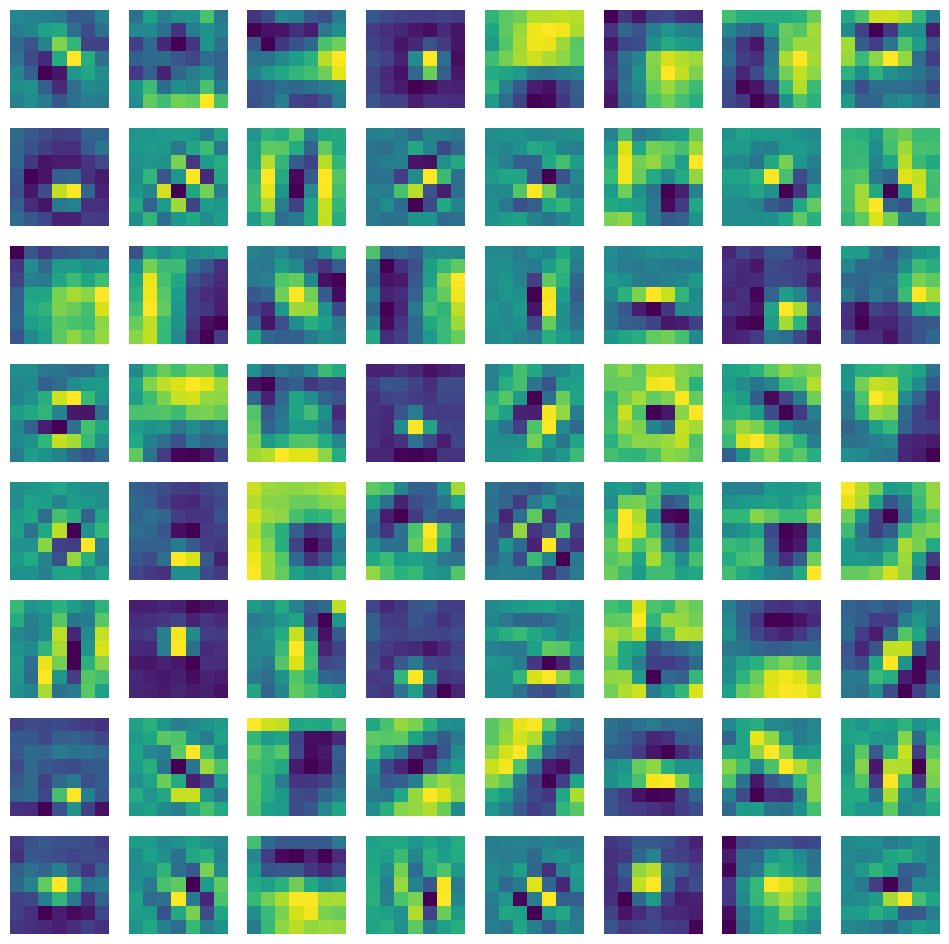

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load the ResNet50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Choose a layer to visualize (you can modify this)
chosen_layer_name = 'conv1_conv'

# Find the chosen layer in the model
chosen_layer = None
for layer in base_model.layers:
    if layer.name == chosen_layer_name:
        chosen_layer = layer
        break

if chosen_layer is None:
    raise ValueError(f"Layer '{chosen_layer_name}' not found in the model.")

# Create a model that outputs the activations of the chosen layer
activation_model = Model(inputs=base_model.input, outputs=chosen_layer.output)

# Get the filters from the chosen layer
filters = chosen_layer.get_weights()[0]

# Display the filters as images
fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(min(64, filters.shape[3])):
    # Get the ith filter
    filter_i = filters[:, :, :, i]

    # Normalize the filter values to the range [0, 1] for display
    filter_i = (filter_i - np.min(filter_i)) / (np.max(filter_i) - np.min(filter_i))

    # Display the filter as a subplot
    axs[i // 8, i % 8].imshow(filter_i[:, :, 0], cmap='viridis')
    axs[i // 8, i % 8].axis('off')

plt.show()

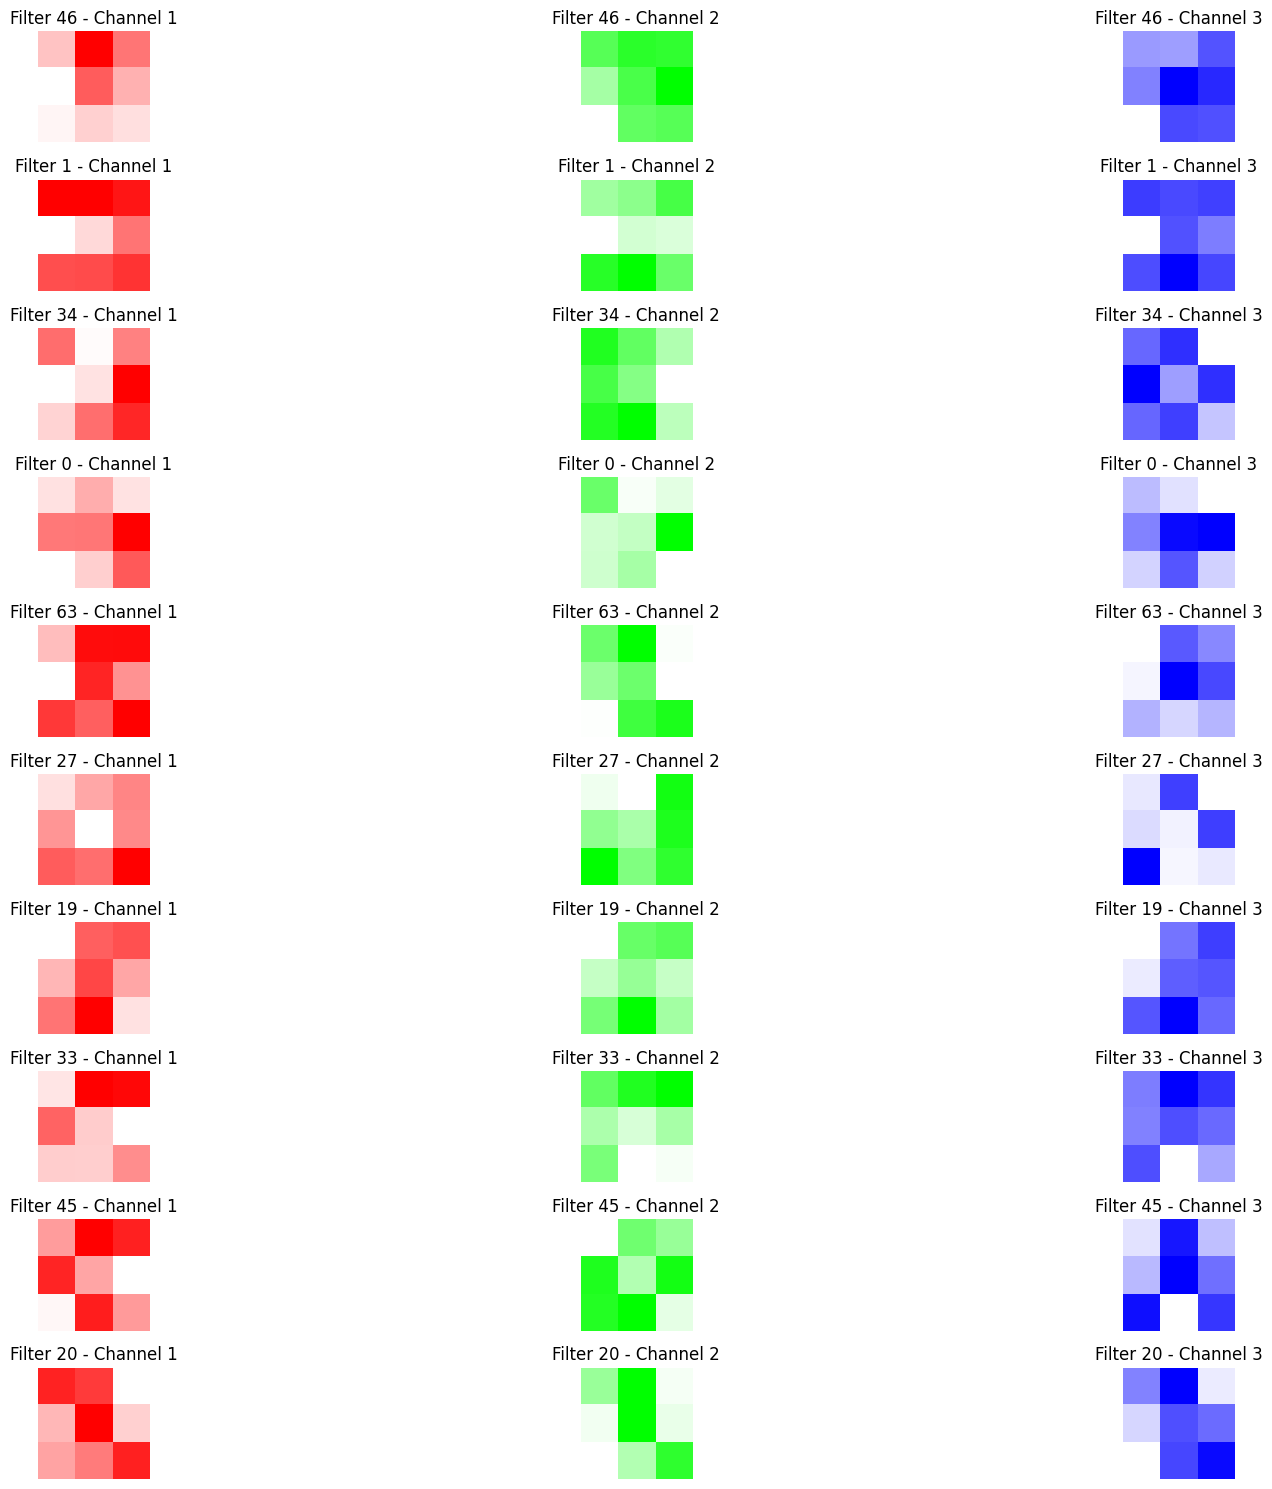

In [9]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Get the weights of the first convolutional layer
conv1_weights = model.layers[1].get_weights()[0]  # Assumes the first convolutional layer is at index 1

# Normalize the weights to the range [0, 1] for visualization
conv1_weights_normalized = (conv1_weights - np.min(conv1_weights)) / (np.max(conv1_weights) - np.min(conv1_weights))

# Select 10 filters randomly
selected_filters = np.random.choice(conv1_weights.shape[-1], size=10, replace=False)

# Create custom colormaps for red, green, and blue channels
red_cmap = LinearSegmentedColormap.from_list('red_cmap', [(1, 0, 0), (1, 1, 1)])
green_cmap = LinearSegmentedColormap.from_list('green_cmap', [(0, 1, 0), (1, 1, 1)])
blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', [(0, 0, 1), (1, 1, 1)])

# Increase the figure size and adjust subplot spacing for better visualization
plt.figure(figsize=(20, 15))

# Plot the selected filters for each channel with custom colormaps
for i, filter_index in enumerate(selected_filters):
    for j in range(3):  # Loop over RGB channels
        plt.subplot(10, 3, i * 3 + j + 1)
        cmap = red_cmap if j == 0 else green_cmap if j == 1 else blue_cmap
        plt.imshow(conv1_weights_normalized[:, :, j, filter_index], cmap=cmap)
        plt.title(f'Filter {filter_index} - Channel {j + 1}')
        plt.axis('off')

plt.tight_layout()
plt.show()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

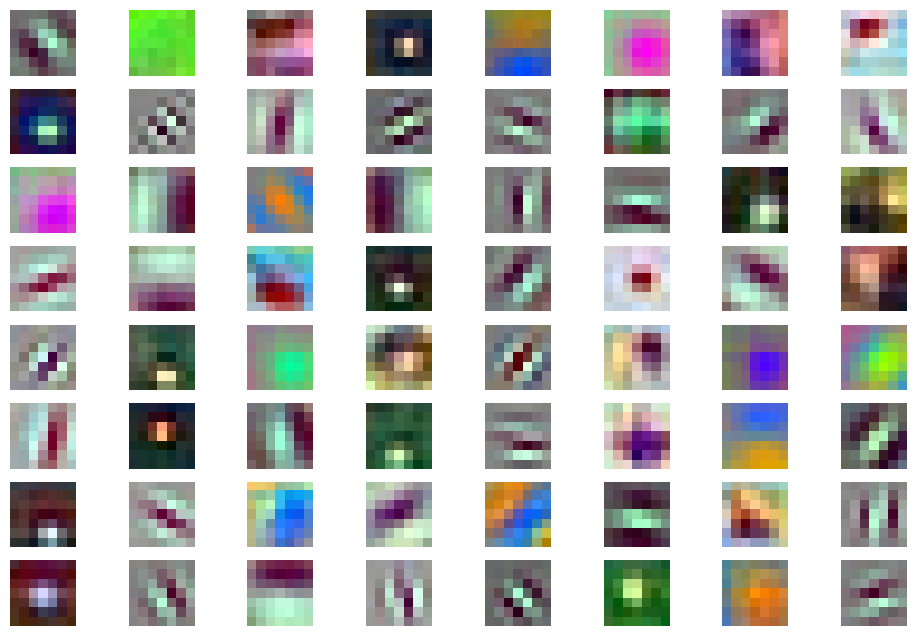

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import applications

# Load the pre-trained ResNet50 model
resnet_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Display the summary of the ResNet50 model
resnet_model.summary()

# Extract the weights of the first convolutional layer
conv1_weights = resnet_model.layers[2].get_weights()[0]

# Visualize the filters of the first convolutional layer
plt.figure(figsize=(12, 8))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    filter_image = conv1_weights[:, :, :, i]
    filter_image = (filter_image - np.min(filter_image)) / (np.max(filter_image) - np.min(filter_image))
    plt.imshow(filter_image)
    plt.axis('off')

plt.show()


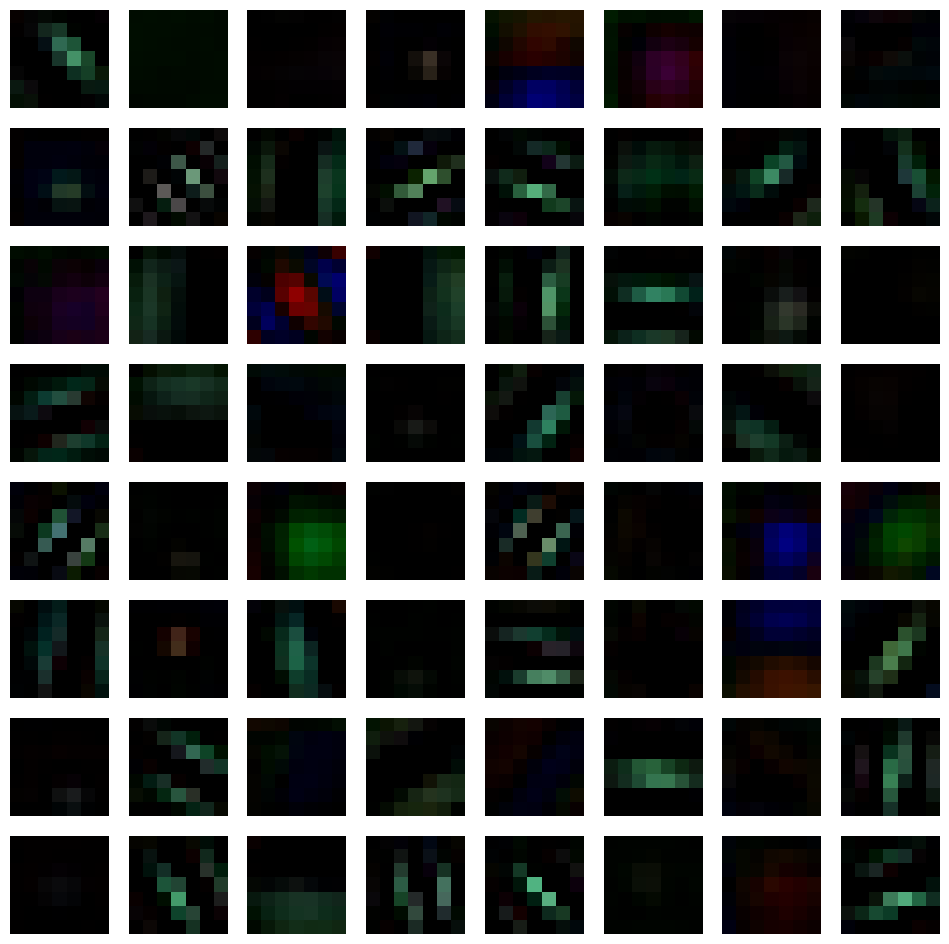

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import ResNet50

# Load ResNet50 model pre-trained on ImageNet
model = ResNet50(weights='imagenet', include_top=False)

# Get the weights of the first convolutional layer
first_layer_weights = model.layers[2].get_weights()[0]

# Reshape the filters for visualization
filters = np.transpose(first_layer_weights, (3, 0, 1, 2))

# Display the filters
fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(filters[i * 8 + j])
        axs[i, j].axis('off')

plt.show()

plt.show()


In [14]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Input layer
input_layer = Input(shape=(32, 32, 3))

# Block 1
conv1 = Conv2D(64, (3, 3), padding='same')(input_layer)
batch_norm1 = BatchNormalization()(conv1)
activation1 = Activation('relu')(batch_norm1)

conv2 = Conv2D(64, (3, 3), padding='same')(activation1)
batch_norm2 = BatchNormalization()(conv2)
activation2 = Activation('relu')(batch_norm2)

pool1 = MaxPooling2D((2, 2))(activation2)

# Block 2
conv3 = Conv2D(128, (3, 3), padding='same')(pool1)
batch_norm3 = BatchNormalization()(conv3)
activation3 = Activation('relu')(batch_norm3)

conv4 = Conv2D(128, (3, 3), padding='same')(activation3)
batch_norm4 = BatchNormalization()(conv4)
activation4 = Activation('relu')(batch_norm4)

pool2 = MaxPooling2D((2, 2))(activation4)

# Flatten and fully connected layers
flatten = Flatten()(pool2)
dense1 = Dense(256)(flatten)
batch_norm5 = BatchNormalization()(dense1)
activation5 = Activation('relu')(batch_norm5)

output_layer = Dense(10, activation='softmax')(activation5)  # Assuming you have 10 classes in CIFAR-10

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Input layer
input_layer = Input(shape=(32, 32, 3))

# Block 1
conv1 = Conv2D(64, (3, 3), padding='same')(input_layer)
batch_norm1 = BatchNormalization()(conv1)
activation1 = Activation('relu')(batch_norm1)

conv2 = Conv2D(64, (3, 3), padding='same')(activation1)
batch_norm2 = BatchNormalization()(conv2)
activation2 = Activation('relu')(batch_norm2)

pool1 = MaxPooling2D((2, 2))(activation2)

# Block 2
conv3 = Conv2D(128, (3, 3), padding='same')(pool1)
batch_norm3 = BatchNormalization()(conv3)
activation3 = Activation('relu')(batch_norm3)

conv4 = Conv2D(128, (3, 3), padding='same')(activation3)
batch_norm4 = BatchNormalization()(conv4)
activation4 = Activation('relu')(batch_norm4)

pool2 = MaxPooling2D((2, 2))(activation4)

# Additional Convolutional Block
conv5 = Conv2D(256, (3, 3), padding='same')(pool2)
batch_norm5 = BatchNormalization()(conv5)
activation5 = Activation('relu')(batch_norm5)

conv6 = Conv2D(256, (3, 3), padding='same')(activation5)
batch_norm6 = BatchNormalization()(conv6)
activation6 = Activation('relu')(batch_norm6)

pool3 = MaxPooling2D((2, 2))(activation6)

# Flatten and fully connected layers
flatten = Flatten()(pool3)
dense1 = Dense(256)(flatten)
batch_norm7 = BatchNormalization()(dense1)
activation7 = Activation('relu')(batch_norm7)

output_layer = Dense(10, activation='softmax')(activation7)  # Assuming you have 10 classes in CIFAR-10

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Epoch 1/100
274/274 [==============================] - 18s 46ms/step - loss: 1.1655 - accuracy: 0.5873 - val_loss: 2.8489 - val_accuracy: 0.1744
Epoch 2/100
  1/274 [..............................] - ETA: 8s - loss: 0.7609 - accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


274/274 [==============================] - 10s 37ms/step - loss: 0.7032 - accuracy: 0.7539 - val_loss: 0.9944 - val_accuracy: 0.6532
Epoch 3/100
274/274 [==============================] - 10s 38ms/step - loss: 0.5154 - accuracy: 0.8208 - val_loss: 0.8531 - val_accuracy: 0.7123
Epoch 4/100
274/274 [==============================] - 10s 37ms/step - loss: 0.3682 - accuracy: 0.8727 - val_loss: 0.7027 - val_accuracy: 0.7680
Epoch 5/100
274/274 [==============================] - 10s 36ms/step - loss: 0.2578 - accuracy: 0.9125 - val_loss: 0.8648 - val_accuracy: 0.7355
Epoch 6/100
274/274 [==============================] - 10s 36ms/step - loss: 0.1685 - accuracy: 0.9445 - val_loss: 0.8285 - val_accuracy: 0.7593
Epoch 7/100
274/274 [==============================] - 10s 36ms/step - loss: 0.1064 - accuracy: 0.9661 - val_loss: 1.2287 - val_accuracy: 0.6995
Epoch 8/100
274/274 [==============================] - 11s 41ms/step - loss: 0.0791 - accuracy: 0.9752 - val_loss: 0.7369 - val_accuracy: 0.80

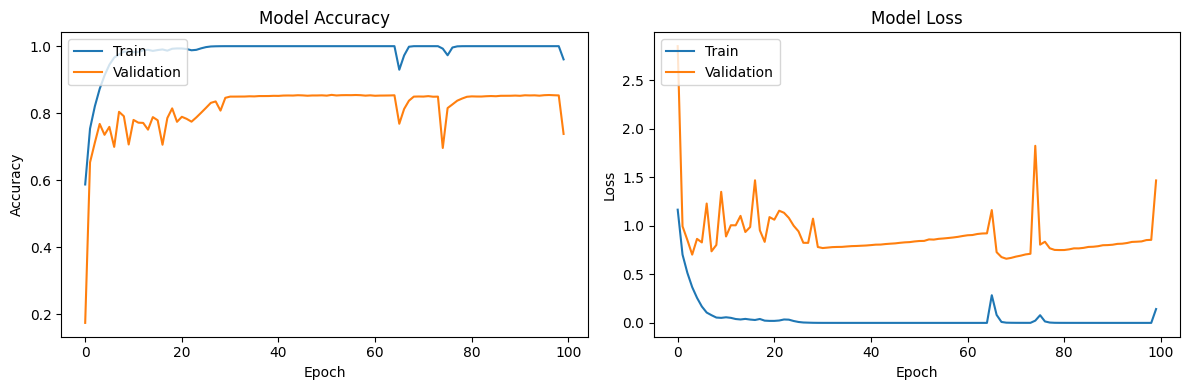

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# Train the model
batch_size = 128
epochs = 100
validation_split = 0.3

# Adding a ModelCheckpoint callback to save the best weights during training
checkpoint = ModelCheckpoint("vgg_like_model.h5", monitor='val_loss', save_best_only=True)

history = model.fit(
    x_train_normalized, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[checkpoint]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plot the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 32, 32, 64)           9472      ['input_10[0][0]']            
                                                                                                  
 batch_normalization_18 (Ba  (None, 32, 32, 64)           256       ['conv2d_20[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 32, 32, 64)           0         ['batch_normalization_18

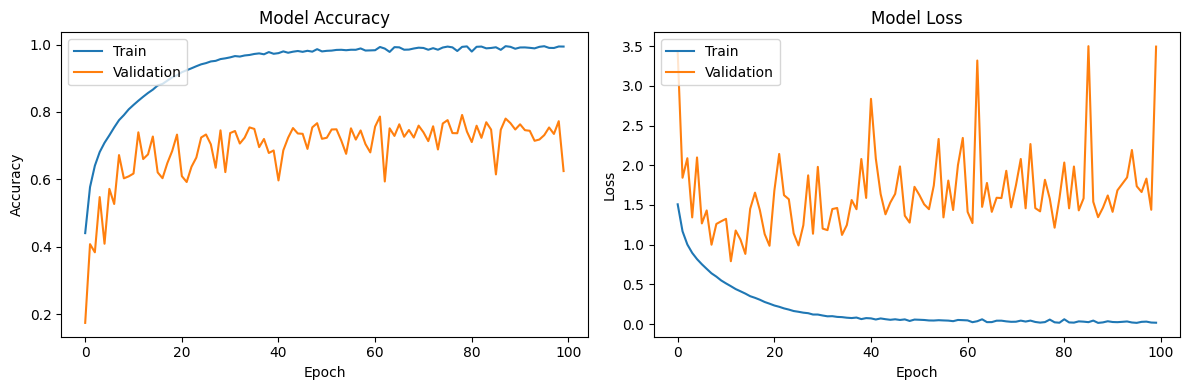

In [18]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# Input layer
input_layer = Input(shape=(32, 32, 3))

# Initial convolutional layer
conv_initial = Conv2D(64, (7, 7), padding='same')(input_layer)
batch_norm_initial = BatchNormalization()(conv_initial)
activation_initial = Activation('relu')(batch_norm_initial)
max_pool_initial = MaxPooling2D((2, 2))(activation_initial)

# Block 1
conv1 = Conv2D(64, (3, 3), padding='same')(max_pool_initial)
batch_norm1 = BatchNormalization()(conv1)
activation1 = Activation('relu')(batch_norm1)

conv2 = Conv2D(64, (3, 3), padding='same')(activation1)
batch_norm2 = BatchNormalization()(conv2)

# Adjusting the dimensions of the residual connection
residual1_adjusted = Conv2D(64, (1, 1), padding='same')(max_pool_initial)

residual1 = Add()([residual1_adjusted, batch_norm2])  # Residual connection
activation_residual1 = Activation('relu')(residual1)

# Block 2
conv3 = Conv2D(128, (3, 3), padding='same')(activation_residual1)
batch_norm3 = BatchNormalization()(conv3)
activation3 = Activation('relu')(batch_norm3)

conv4 = Conv2D(128, (3, 3), padding='same')(activation3)
batch_norm4 = BatchNormalization()(conv4)

# Adjusting the dimensions of the residual connection
residual2_adjusted = Conv2D(128, (1, 1), padding='same')(activation_residual1)

residual2 = Add()([residual2_adjusted, batch_norm4])  # Residual connection
activation_residual2 = Activation('relu')(residual2)

# Global Average Pooling
global_avg_pooling = GlobalAveragePooling2D()(activation_residual2)

# Dense layers
dense1 = Dense(256, activation='relu')(global_avg_pooling)
output_layer = Dense(10, activation='softmax')(dense1)  # Assuming you have 10 classes in CIFAR-10

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
batch_size = 128
epochs = 100
validation_split = 0.3

# Adding a ModelCheckpoint callback to save the best weights during training
checkpoint = ModelCheckpoint("resnet_like_model.h5", monitor='val_loss', save_best_only=True)

history = model.fit(
    x_train_normalized, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[checkpoint]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plot the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

